In [ ]:
#!pip install pmdarima

In [ ]:
import sys
print("python version",sys.version)
import numpy
print("numpy version",numpy.__version__)
import scipy
print("scipy version",scipy.__version__)
import sklearn
print("scikit -learn version",sklearn.__version__)
import pandas
print("pandas version",pandas.__version__)
import statsmodels
print("statsmodels version",statsmodels.__version__)
import pmdarima
print("pyramid version",pmdarima.__version__)
import pip
print("pip version",pip.__version__)

python version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy version 1.21.6
scipy version 1.4.1
scikit -learn version 1.0.2
pandas version 1.3.5
statsmodels version 0.13.2
pyramid version 1.8.5
pip version 21.1.3


In [ ]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from sklearn import metrics
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
flight_data=sns.load_dataset("flights")
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
month=pd.date_range('19490131',periods=144,freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [ ]:
flight_data['datestamp']=month
flight_data.head()

,year,month,passengers,datestamp
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   datestamp   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [ ]:
flight_data_pivot=flight_data.pivot('month','year','passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 1440x720 with 0 Axes>

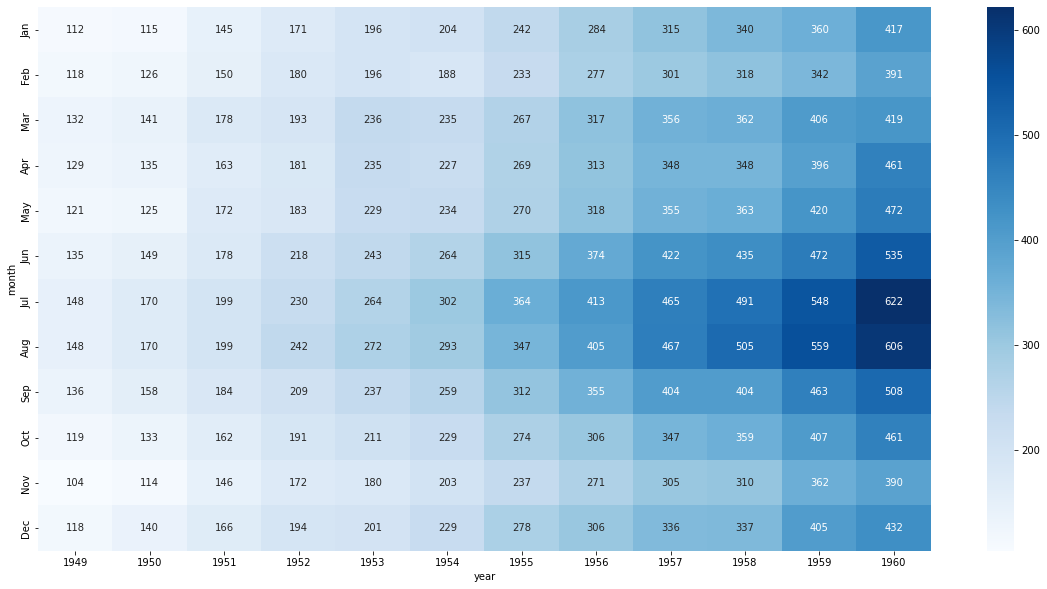

<Figure size 1440x720 with 0 Axes>

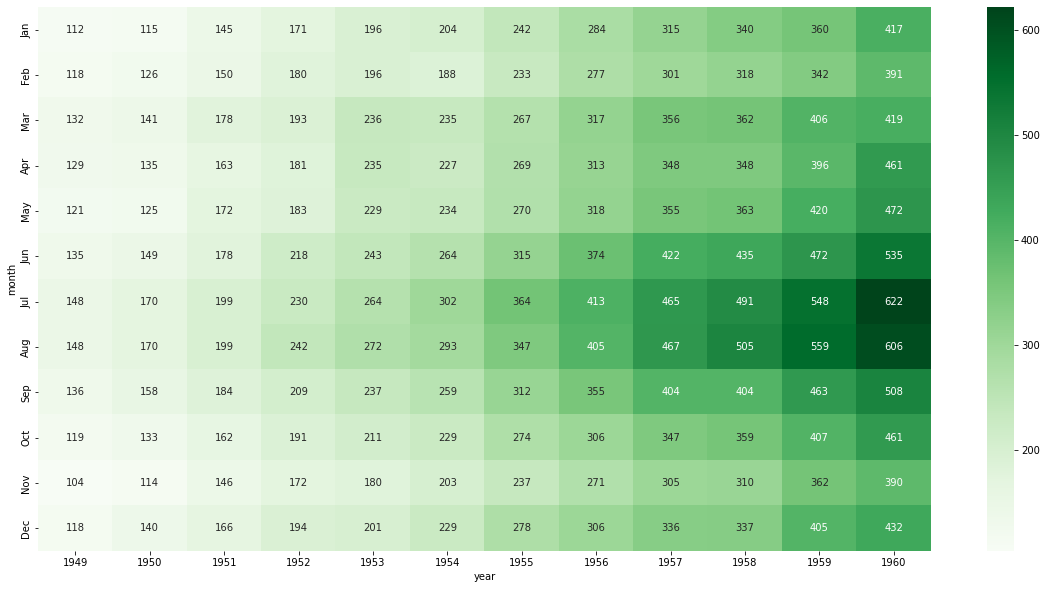

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(flight_data_pivot,annot=True,fmt= "d",cmap="Blues")
plt.show()
plt.figure(figsize=(20,10))
sns.heatmap(flight_data_pivot,annot=True,cmap="Greens",fmt="d")
plt.show()

In [ ]:
data=flight_data.loc[:,('datestamp','passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
data.set_index('datestamp',inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


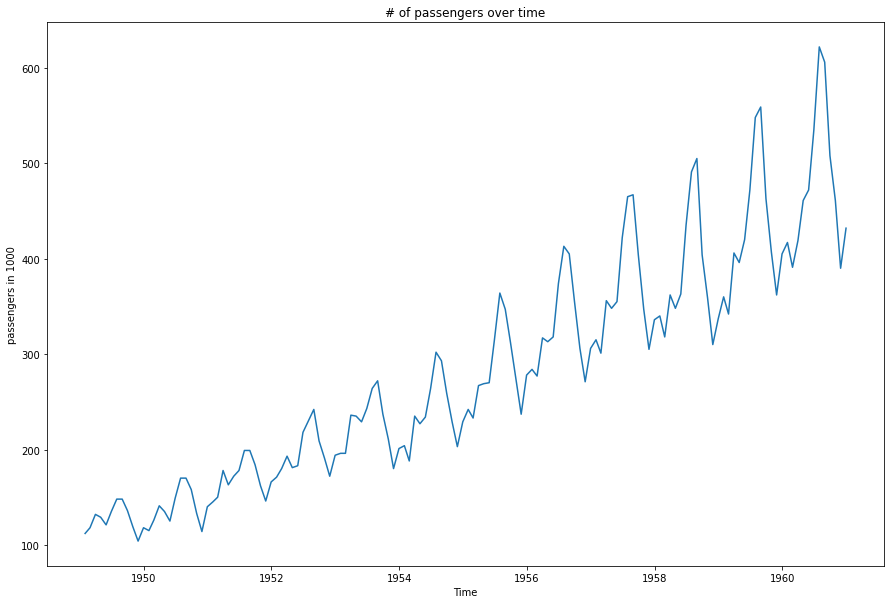

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('passengers in 1000')
plt.title("# of passengers over time")
plt.show;

In [ ]:
decomposition=seasonal_decompose(data,model='multiplicative',extrapolate_trend='freq')

In [ ]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<Figure size 1440x720 with 0 Axes>

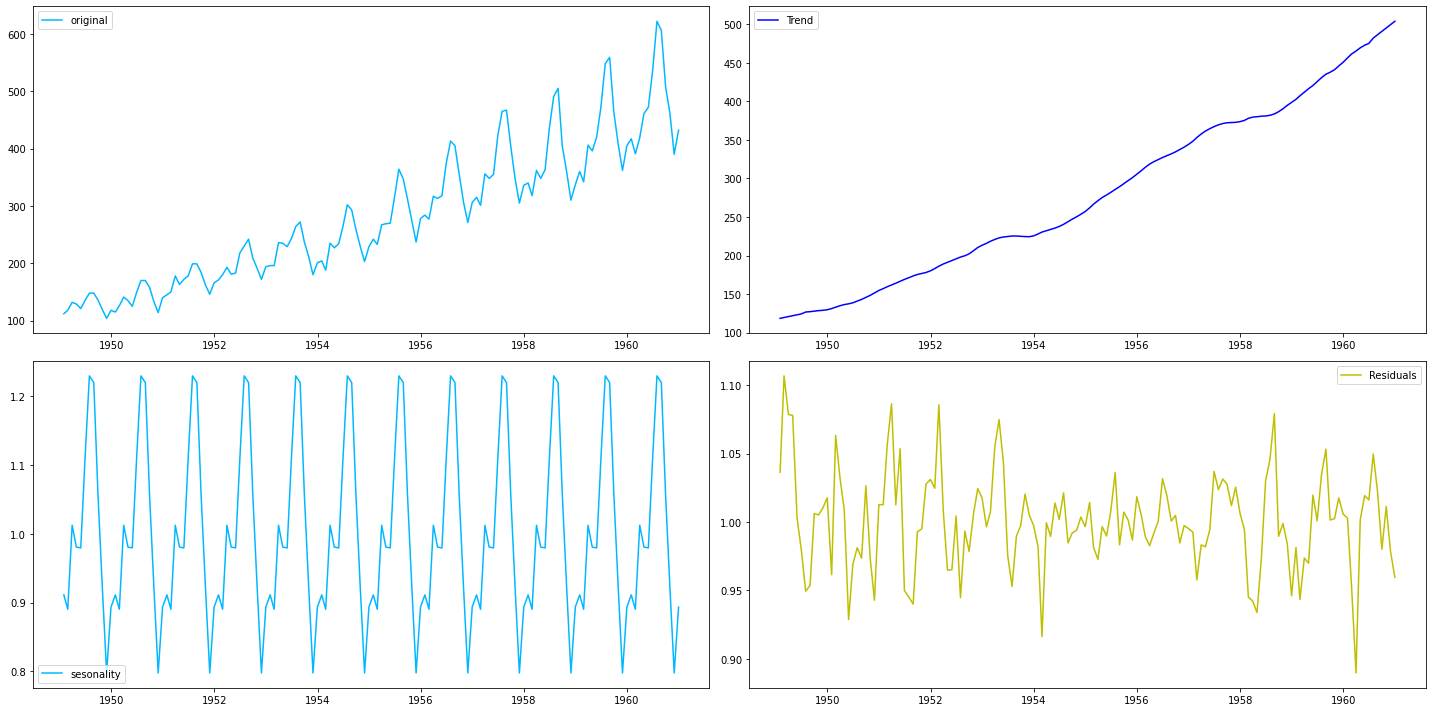

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(data,color='#00b8ff',label='original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

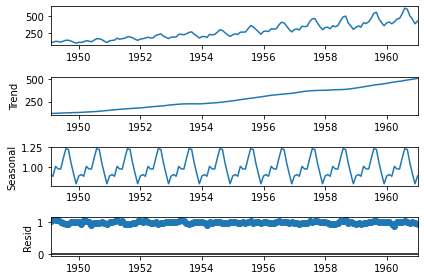

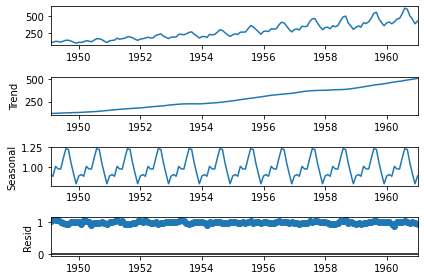

In [ ]:
decomposition.plot()

In [ ]:
decomposition=seasonal_decompose(data,model='additive')

<Figure size 1440x720 with 0 Axes>

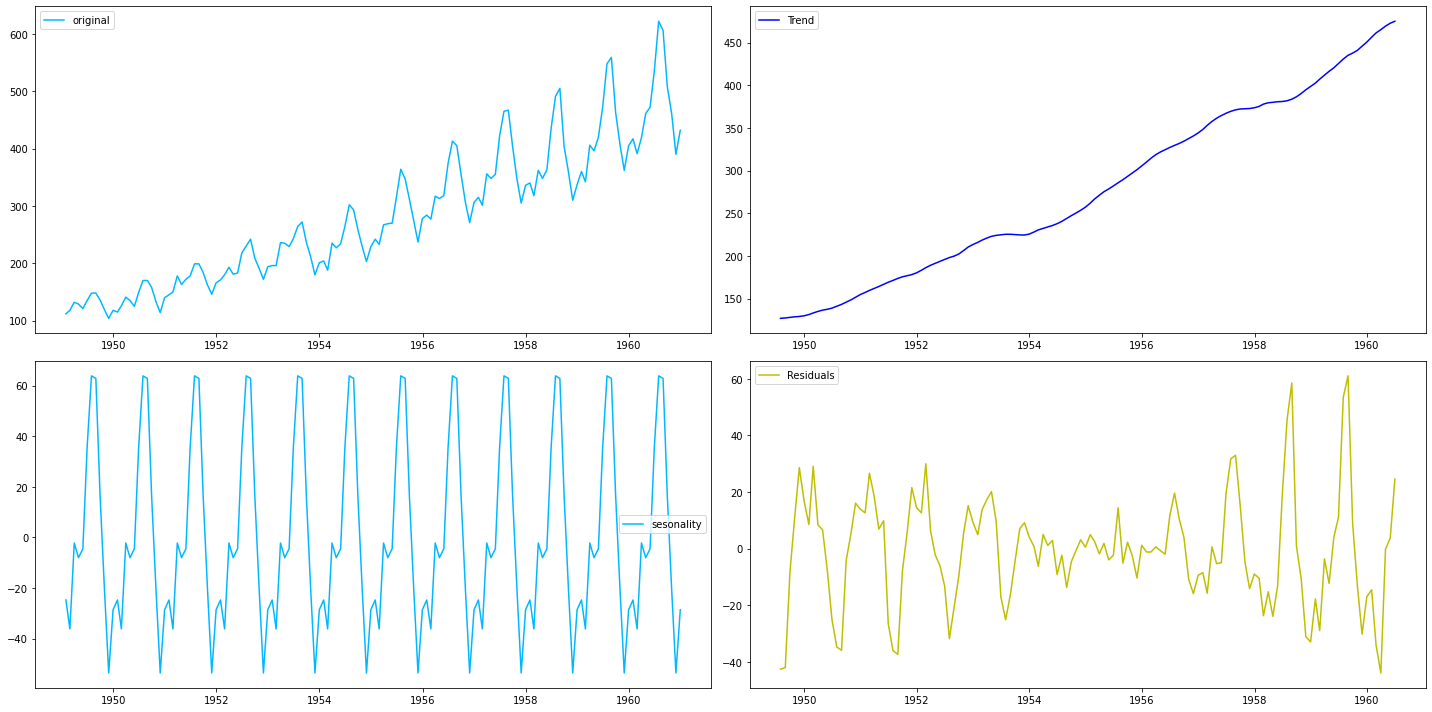

In [ ]:
plt.figure(figsize=(20,10))
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(data,color='#00b8ff',label='original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')

plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

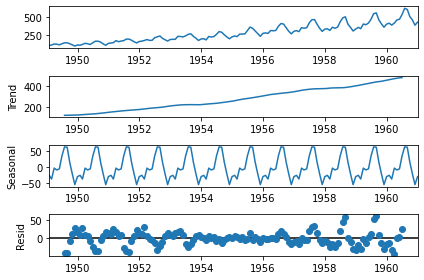

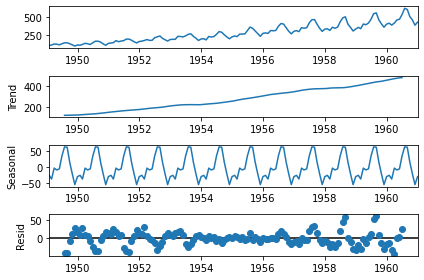

In [ ]:
decomposition.plot()

In [ ]:
from pmdarima.arima.stationarity import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.is_stationary(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.01, False)

In [ ]:
adf_test.should_diff (data)

(0.01, False)

Here alpha=0.05 means that there is 5% probablity that we may make an erroneous decision
 or we are 95% confident that we are correct.
 here .99 is p-value and 99% confident that data is not stationary.and we can't reject the NULL HYPOTHESIS.
 SO IF ARIMA MODEL INSISTS THAT WE NEED TO MAKE TIME SERIES STATIONARY 
 THEN arima model need to first make time series stationary and then build a model on that.

In [ ]:
train,test=data[:132],data[132:]
train.shape
test.shape

(132, 1)

(12, 1)

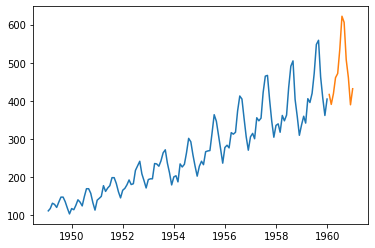

In [ ]:
plt.plot(train)
plt.plot(test)
plt.show()

In [ ]:
#fitting a stepwise model:
Arima_model=auto_arima(train,start_p=0,start_q=0,max_p=8,max_q=8,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)
'''here P,D,Q are seasonal components and p,d,q are components for arima modeeling for current year i.e. if p=0,q=0 our ARIMA model becomes 
auto regressive model only.when p=1 then y(t)=f(y(t-1)).when p=2,y(t)=f(y(t-1))+f(y(t-2)) and so on.
WHEN AR is there only then it is autoregressive only i.e. pth term,when it is ARI,
then model depends on p and q both where q is differencing terms and t is error terms.
when all p,d,q is there then it is ARIMA Modelling.small p,d,q signifies current year performance.P,D,Q signifies ARIMA model depends on 
 what happenened in previous year i.e. seasonal_order.random_state=20 and n_fits=30 
 i.e. build maximum 30 models i.e. we are doing randomized search instead of grid search'''

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.05 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.27 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostrin

 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.08 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.83 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.81 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.30 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.18 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostrin

 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.40 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.11 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.29 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=905.686, Time=0.14 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(3,0,0)(1,1,0)[12] intercept   : AIC=906.124, Time=0.58 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(3,0,0)(0,1,1)[12] intercept   : AIC=906.388, Time=0.43 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(3,0,0)(1,1,1)[12] intercept   : AIC=906.035, Time=1.09 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(4,0,0)(0,1,0)[12] intercept   : AIC=907.453, Time=0.23 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(3,0,1)(0,1,0)[12] intercept   : AIC=907.583, Time=0.27 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=906.399, Time=0.21 sec
 ARIMA(4,0,1)(0,1,0)[12] intercept   : AIC=909.320, Time=0.46 sec
 ARIMA(3,0,0)(0,1,0)[12]             : AIC=911.907, Time=0.08 sec

Best model:  ARIMA(3,0,0)(0,1,0)[12] intercept
Total fit time: 10.207 seconds


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


'here P,D,Q are seasonal components and p,d,q are components for arima modeeling for current year i.e. if p=0,q=0 our ARIMA model becomes \nauto regressive model only.when p=1 then y(t)=f(y(t-1)).when p=2,y(t)=f(y(t-1))+f(y(t-2)) and so on.\nWHEN AR is there only then it is autoregressive only i.e. pth term,when it is ARI,\nthen model depends on p and q both where q is differencing terms and t is error terms.\nwhen all p,d,q is there then it is ARIMA Modelling.small p,d,q signifies current year performance.P,D,Q signifies ARIMA model depends on \n what happenened in previous year i.e. seasonal_order.random_state=20 and n_fits=30 \n i.e. build maximum 30 models i.e. we are doing randomized search instead of grid search'

In [ ]:
Arima_model.summary()
'''SARIMAX(2, 1, 3)x(1, 0, 0, 12):here p,d,q=2,1,3 and P,D,Q=1,0,0 and 12 is building ARIMA Model with a lag of 12 for seasonal arima.'''

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 11 Jul 2022   AIC                            905.686
Time:                                    17:36:17   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'SARIMAX(2, 1, 3)x(1, 0, 0, 12):here p,d,q=2,1,3 and P,D,Q=1,0,0 and 12 is building ARIMA Model with a lag of 12 for seasonal arima.'

In [ ]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=12),index=test.index)

In [ ]:
prediction.columns=['Predicted_Passengers']

In [ ]:
prediction

,Predicted_Passengers
datestamp,
1960-01-31,419.967172
1960-02-29,399.849851
1960-03-31,457.994382
1960-04-30,444.474156
1960-05-31,464.789179
1960-06-30,514.125441
1960-07-31,587.804170
1960-08-31,597.010823
1960-09-30,499.531269


<Figure size 1080x720 with 0 Axes>

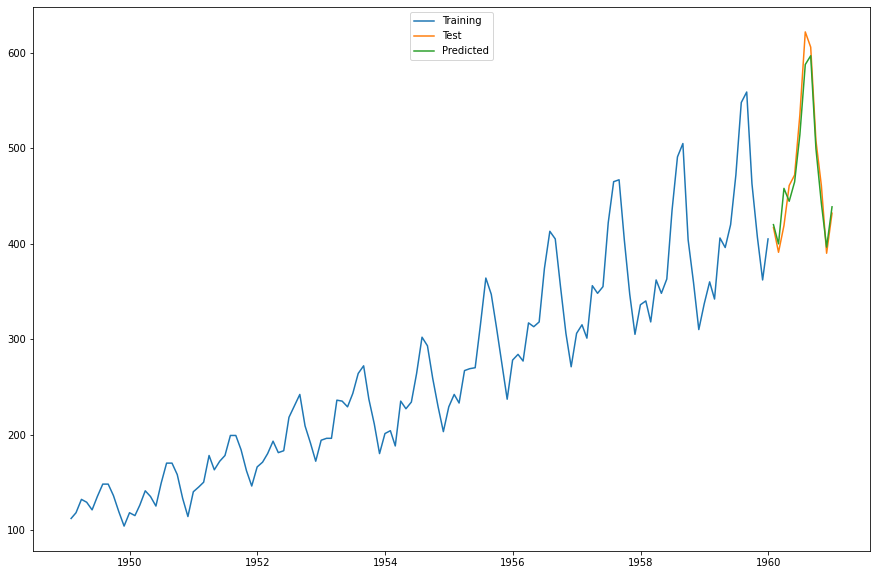

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()


In [ ]:
test['Predicted_Passengers']=prediction
test['Error']=test['passengers']-test['Predicted_Passengers']
test

,passengers,Predicted_Passengers,Error
datestamp,,,
1960-01-31,417,419.967172,-2.967172
1960-02-29,391,399.849851,-8.849851
1960-03-31,419,457.994382,-38.994382
1960-04-30,461,444.474156,16.525844
1960-05-31,472,464.789179,7.210821
1960-06-30,535,514.125441,20.874559
1960-07-31,622,587.804170,34.195830
1960-08-31,606,597.010823,8.989177
1960-09-30,508,499.531269,8.468731


**STEP6-EVALUATE MODEL PERFORMANCE for AUTO ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.passengers,test.Predicted_Passengers),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


14.898

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [ ]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.passengers,test.Predicted_Passengers),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


343.601

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [ ]:
import math
math.sqrt(mse)

18.536477551034338

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.passengers,test.Predicted_Passengers),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


8.92

**Mean Absolute Percentage Error FOR TEST DATA**

In [ ]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.passengers-test.Predicted_Passengers)/test.passengers))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


3.098

,passengers
datestamp,
1949-01-31,4.718499
1949-02-28,4.770685
1949-03-31,4.882802
1949-04-30,4.859812
1949-05-31,4.795791


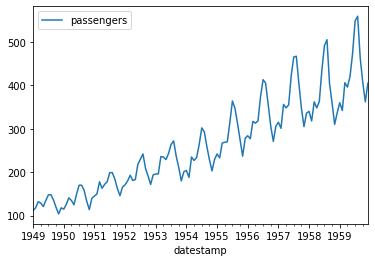

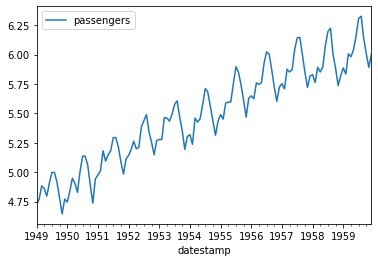

In [ ]:
train_log=np.log(train)
train_log.head()
train.plot()
train_log.plot()
plt.show()

In [ ]:
#fitting a stepwise model:
Arima_model=auto_arima(train_log,start_p=0,start_q=0,max_p=8,max_q=8,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.07 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.71 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostrin

 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-413.206, Time=0.14 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-437.656, Time=2.66 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=-438.983, Time=3.40 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=-438.164, Time=6.63 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=-437.644, Time=4.30 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=-438.582, Time=2.17 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=-435.643, Time=7.68 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=-348.753, Time=3.64 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=-445.100, Time=4.07 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-443.219, Time=2.10 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(2,0,0)(4,1,0)[12] intercept   : AIC=-443.020, Time=7.68 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(2,0,0)(3,1,1)[12] intercept   : AIC=-441.223, Time=4.56 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=-443.458, Time=2.81 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(2,0,0)(4,1,1)[12] intercept   : AIC=-441.007, Time=8.21 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(3,0,0)(3,1,0)[12] intercept   : AIC=-443.251, Time=5.00 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,1)(3,1,0)[12] intercept   : AIC=-443.269, Time=4.58 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(1,0,1)(3,1,0)[12] intercept   : AIC=-444.014, Time=6.56 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


 ARIMA(3,0,1)(3,1,0)[12] intercept   : AIC=-441.322, Time=8.35 sec


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()


 ARIMA(2,0,0)(3,1,0)[12]             : AIC=inf, Time=3.22 sec

Best model:  ARIMA(2,0,0)(3,1,0)[12] intercept
Total fit time: 89.229 seconds


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


In [ ]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(3, 1, 0, 12)   Log Likelihood                 229.550
Date:                            Mon, 11 Jul 2022   AIC                           -445.100
Time:                                    17:45:15   BIC                           -425.588
Sample:                                         0   HQIC                          -437.176
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0408      0.021      1.937      0.053      -0.000       0.082
ar.L1          0.5799      0.086      6.730      0.000       0.411       0.749
ar.L2          0.2603      0.085      3.072      0.002       0.094       0.426
ar.S.L12      -0.5663      0.103     -5.475      0.000      -0.769      -0.364
ar.S.L24      -0.3205      0.144     -2.232      0.026      -0.602      -0.039
ar.S.L36      -0.2066      0.121     -1.708      0.088      -0.444       0.030
sigma2         0.0012      0.000      8.507      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.00
Prob(Q):                              0.93   Prob(JB):                         0.03
Heteroskedasticity (H):               0.37   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction_log=pd.DataFrame(Arima_model.predict(n_periods=12),index=test.index)
prediction_log.columns=['Predicted_Passengers']

In [ ]:
prediction_log

,Predicted_Passengers
datestamp,
1960-01-31,6.044927
1960-02-29,5.998352
1960-03-31,6.153471
1960-04-30,6.129478
1960-05-31,6.172408
1960-06-30,6.322025
1960-07-31,6.449240
1960-08-31,6.462229
1960-09-30,6.282817


In [ ]:
prediction1=np.exp(prediction_log)
prediction1

,Predicted_Passengers
datestamp,
1960-01-31,421.967047
1960-02-29,402.764591
1960-03-31,470.347264
1960-04-30,459.196359
1960-05-31,479.338746
1960-06-30,556.699151
1960-07-31,632.221397
1960-08-31,640.487333
1960-09-30,535.294668


In [ ]:
test['log_prediction']=prediction1
test['Error_log']=test['passengers']-test['log_prediction']
test

,passengers,Predicted_Passengers,Error,log_prediction,Error_log
datestamp,,,,,
1960-01-31,417,419.967172,-2.967172,421.967047,-4.967047
1960-02-29,391,399.849851,-8.849851,402.764591,-11.764591
1960-03-31,419,457.994382,-38.994382,470.347264,-51.347264
1960-04-30,461,444.474156,16.525844,459.196359,1.803641
1960-05-31,472,464.789179,7.210821,479.338746,-7.338746
1960-06-30,535,514.125441,20.874559,556.699151,-21.699151
1960-07-31,622,587.804170,34.195830,632.221397,-10.221397
1960-08-31,606,597.010823,8.989177,640.487333,-34.487333
1960-09-30,508,499.531269,8.468731,535.294668,-27.294668


**STEP6-EVALUATE MODEL PERFORMANCE for AUTO ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.passengers,prediction1),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


19.179

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [ ]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.passengers,prediction1),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


562.526

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [ ]:
import math
math.sqrt(mse)

23.717630573056827

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.passengers,prediction1),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


16.732

In [ ]:
test.head()

,passengers,Predicted_Passengers,Error,log_prediction,Error_log
datestamp,,,,,
1960-01-31,417,419.967172,-2.967172,421.967047,-4.967047
1960-02-29,391,399.849851,-8.849851,402.764591,-11.764591
1960-03-31,419,457.994382,-38.994382,470.347264,-51.347264
1960-04-30,461,444.474156,16.525844,459.196359,1.803641
1960-05-31,472,464.789179,7.210821,479.338746,-7.338746


In [ ]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1960-01-31 to 1960-12-31
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   passengers            12 non-null     int64  
 1   Predicted_Passengers  12 non-null     float64
 2   Error                 12 non-null     float64
 3   log_prediction        12 non-null     float64
 4   Error_log             12 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 876.0 bytes


(12, 5)

In [ ]:
prediction1.info()
prediction1.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1960-01-31 to 1960-12-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Predicted_Passengers  12 non-null     float64
dtypes: float64(1)
memory usage: 492.0 bytes


(12, 1)

<Figure size 1080x720 with 0 Axes>

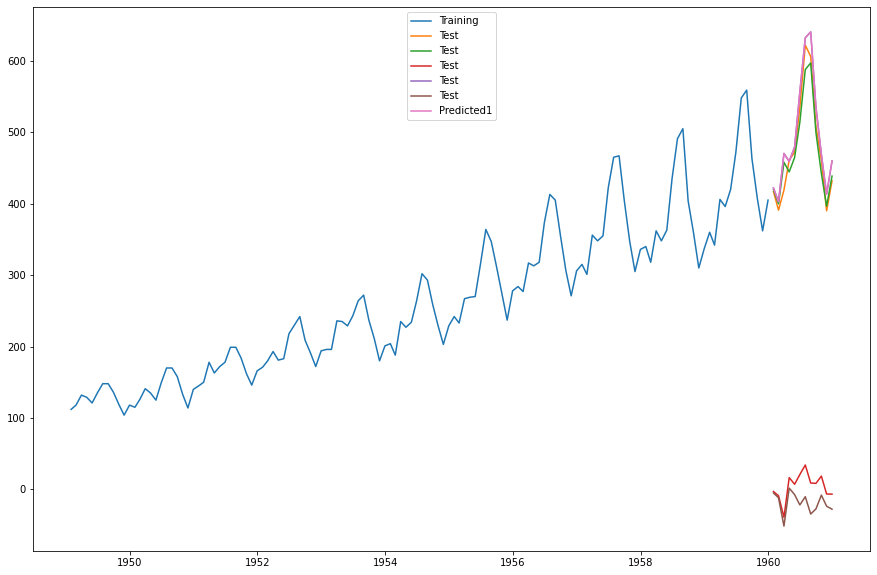

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction1,label='Predicted1')
plt.legend(loc='upper center')
plt.show()

In [2]:
!jupyter nbconvert CAPSTONE1_AUTO_ARIMA_DEMO.ipynb

[NbConvertApp] Converting notebook CAPSTONE1_AUTO_ARIMA_DEMO.ipynb to html
[NbConvertApp] Writing 1354835 bytes to CAPSTONE1_AUTO_ARIMA_DEMO.html
